In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump, load
%matplotlib inline

plt.style.use('seaborn')

In [5]:
month = 'nov'
print(month)

# read saved dataset.
df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()

# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

nov


'number of valid meterids:'

118

### Get clustering info

In [6]:
from sklearn.cluster import KMeans

In [8]:
def get_monthly_result(month='nov', n_clusters=3):
    print(month)
    # read saved dataset.
    df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
    df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
    df_normalized.head()

    # get groups and keys on dataset.

    new_groups = df_normalized.groupby('meterid')
    new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

    new_id_list = list(new_keys)
    display('number of valid meterids:', len(new_id_list))

    #  Construct dataframe over which to run correlation analysis.

    df_total = pd.DataFrame()
    display(df_total)
    for key in new_id_list:
        df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
        df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)

    display(len(df_total))
    #display(df_total)  # column names are meterids

    # get corr matrix

    df_total = df_total.fillna(0)
    df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
    df_corr = df_corr.fillna(0)
    #display(df_corr)

    # find top n positive correlations per meterid
#     n = 10
#     for meterid in new_id_list[1:2]:    
#         # slice is to show an example.
#         df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
#         sr_top5 = df_corr_sorted.iloc[1:1+n]
#         df_top5 = sr_top5.to_frame()
#         df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

#         data = [meterid for i in range(n)]
#         df_top5 = df_top5.assign(id=data)
#         display(df_top5)

    # clustering

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_corr)
    labels = kmeans.labels_
    print(labels)

    origin_date = df_normalized['index'].iloc[0]

    for cluster_label in range(n_clusters):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
        axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
        axes.set_xlabel(f'hours elapsed since {origin_date}')
        axes.set_ylabel(f'cumul value')
        i = 0
        for key in new_id_list:
            if labels[i] == cluster_label:
                axes.scatter(df_total.index, df_total[f'{key}'])

            i += 1

nov


'number of valid meterids:'

118

""


721

[2 2 2 1 1 1 1 0 0 1 1 1 1 0 2 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 2 2 2 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 2 0 1 1 1
 2 1 1 1 1 1 1 1 0 2 2 1 1 0 1 0 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 2 2]
dec


'number of valid meterids:'

119

""


745

[2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 0 2 2 0 2 0 2 0 0 2 2 2 2 2 2
 0 2 2 2 2 2 0 2]
jan


'number of valid meterids:'

119

""


745

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0]
feb


'number of valid meterids:'

118

""


697

[2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2
 2 0 0 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 2 2 0 2]
mar


'number of valid meterids:'

90

""


745

[1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


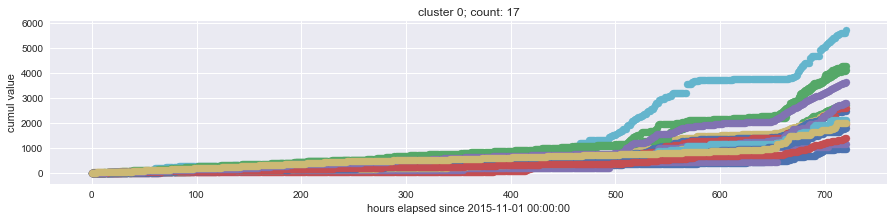

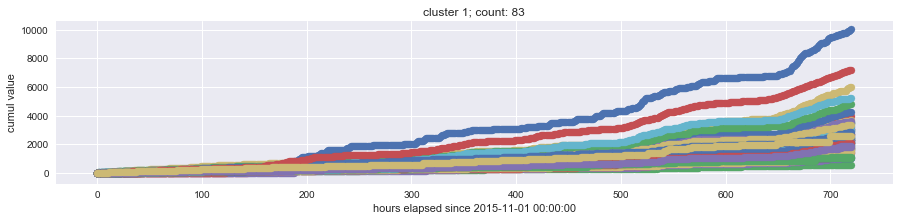

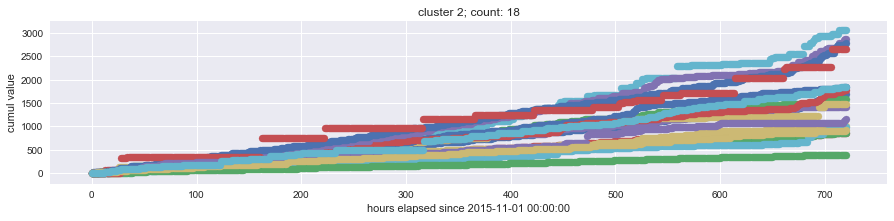

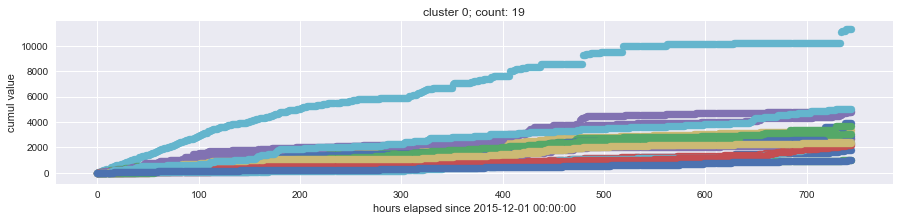

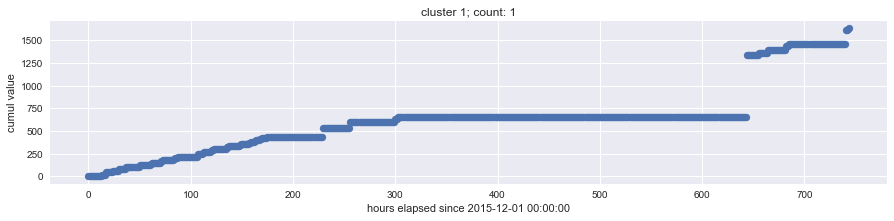

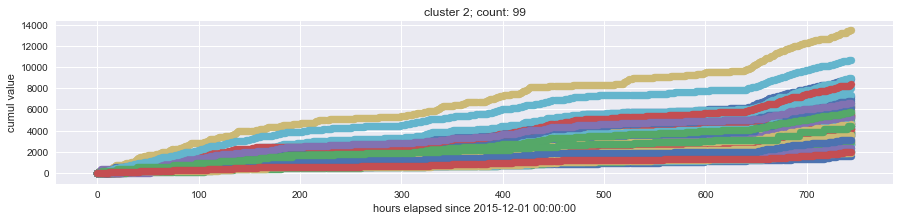

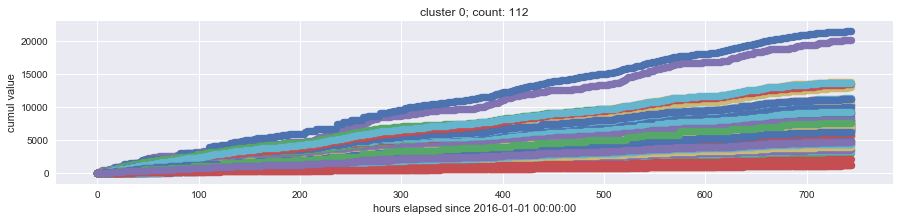

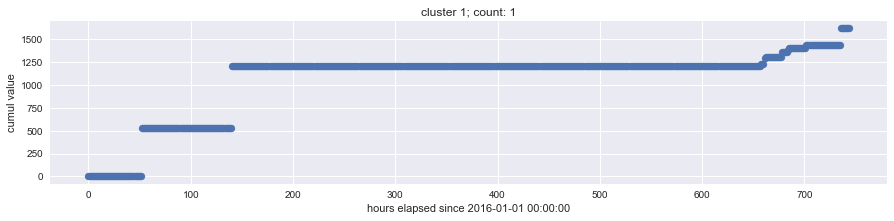

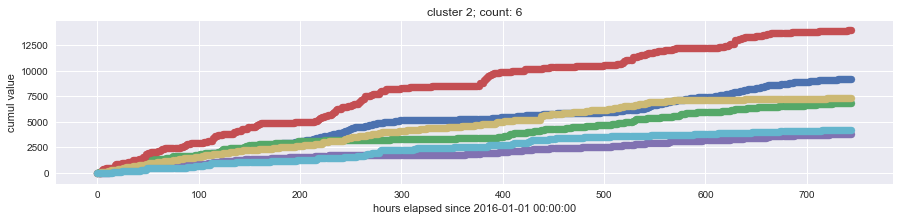

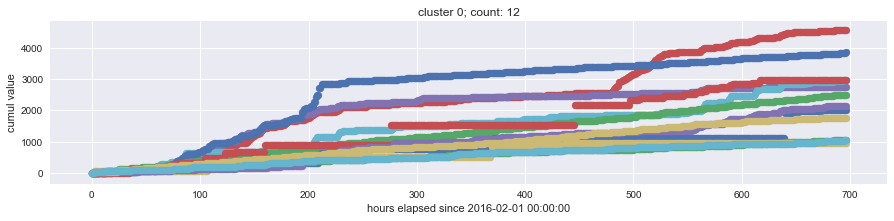

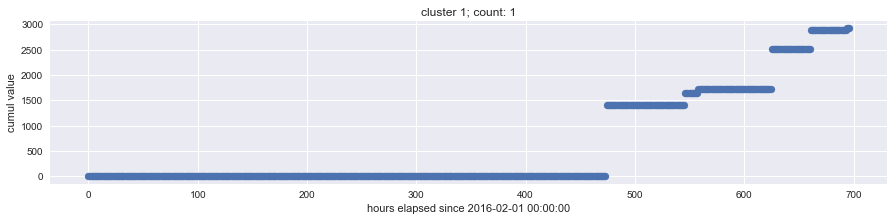

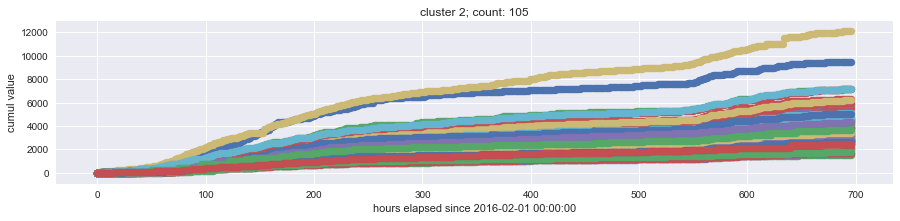

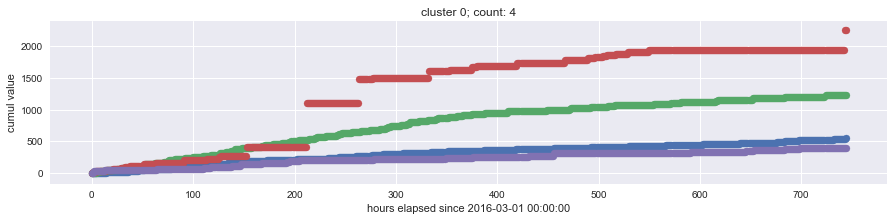

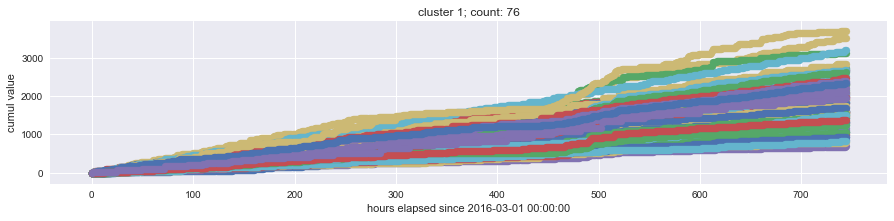

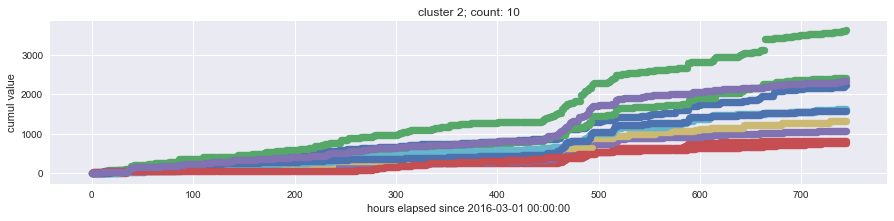

In [11]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
n_clusters = 3
for month in months:
    get_monthly_result(month, n_clusters)

### Add cluster label to data

In [13]:
# cluster labels for month=nov and n_clusters=3
labels = [2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,\
          1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1,\
          1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1,\
          1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,\
          1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2]

df_new = pd.DataFrame()
for i in range(len(new_id_list)):
    df_i = new_groups.get_group(new_id_list[i])
    df_i['cluster_label'] = labels[i]
    df_new = df_new.append(df_i, ignore_index=True)
df_new.head()

C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label,cluster_label
0,2015-11-01 00:00:00,0.0,35,67.0,75.0,3.0,0.0,0,0,2
1,2015-11-01 01:00:00,12.0,35,67.0,75.0,3.0,12.0,1,0,2
2,2015-11-01 02:00:00,0.0,35,67.0,75.0,3.0,12.0,2,0,2
3,2015-11-01 03:00:00,2.0,35,67.0,75.0,3.0,14.0,3,0,2
4,2015-11-01 04:00:00,0.0,35,67.0,75.0,3.0,14.0,4,0,2


In [53]:
# split all data into three datasets (train, val, test) by time period.

def split_agg_data(train_size=0.8, valid_size=0.1):
    # df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
    num_samples_per_meterid = len(df_new) / len(new_id_list)  # this must be a whole number
    
    test_end = train_size * num_samples_per_meterid
    val_end = (train_size+valid_size) * num_samples_per_meterid
    
    train_mask = (df_new['time_integer'] >= 0) & (df_new['time_integer'] < test_end)
    val_mask = (df_new['time_integer'] >= test_end) & (df_new['time_integer'] < val_end)
    test_mask = (df_new['time_integer'] >= val_end) & (df_new['time_integer'] < num_samples_per_meterid)
        
    df_train = df_new.loc[train_mask]
    df_val = df_new.loc[val_mask]
    df_test = df_new.loc[test_mask]

    return df_train, df_val, df_test

In [54]:
df_train, df_val, df_test = split_agg_data(train_size=0.8, valid_size=0.1)

In [55]:
x_column_names = ['time_integer', 'label', 'cluster_label',\
                  'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

X_train = df_train[x_column_names].to_numpy()
X_val = df_val[x_column_names].to_numpy()
X_test = df_test[x_column_names].to_numpy()

y_train = df_train['norm_cumul_value'].to_numpy()
y_val = df_val['norm_cumul_value'].to_numpy()
y_test = df_test['norm_cumul_value'].to_numpy()